In [1]:
import numpy as np 
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
from subprocess import check_output
sns.set()

In [2]:
# Se carga el dataset

Dataset = "../input/fivethirtyeight/data/data/nutrition-studies/nutrition-studies/raw_anonymized_data.csv"
d = pd.read_csv(Dataset)

# **1 - Descripcion del data set**

### **Resumen del DataSet**

In [3]:
# Vemos las primeras y las ultimas 10 filas.

the_first_teen = d.head(10)
the_last_teen  = d.tail(10)

reduced_dataset = pd.concat([the_first_teen, the_last_teen], axis=0) # Apilamos uno encima del otro

reduced_dataset.head(20)

,ID,cancer,diabetes,heart_disease,belly,ever_smoked,currently_smoke,smoke_often,smoke_rarely,never_smoked,...,DT_FIBER_INSOL,DT_FIBER_SOL,DT_PROT_ANIMAL,DT_PROT_VEGETABLE,DT_NITROGEN,PHYTIC_ACID,OXALIC_ACID,COUMESTROL,BIOCHANIN_A,FORMONONETIN
0,1003,Yes,No,No,Innie,Yes,Yes,Yes,No,No,...,7.38,1.25,75.46,16.00,14.89,365.70,318.11,0.01170,0.0658,0.00324
1,1053,No,Yes,Yes,Outie,Yes,Yes,No,Yes,No,...,9.11,3.37,59.41,18.25,12.51,434.98,112.66,0.01070,0.1390,0.00743
2,1006,Yes,Yes,Yes,Innie,No,No,No,No,Yes,...,11.56,4.74,61.49,28.46,14.45,606.43,213.41,0.09650,0.0519,0.00946
3,1166,No,No,No,Innie,No,No,No,No,Yes,...,26.34,10.85,28.71,44.59,12.15,1570.07,334.08,0.28300,0.0890,0.01260
4,1134,Yes,No,No,Innie,No,No,No,No,Yes,...,16.48,4.80,32.41,28.23,9.80,616.99,422.55,0.16300,0.0994,0.02070
5,1014,No,No,No,Innie,Yes,Yes,No,Yes,No,...,20.32,8.55,13.53,32.42,7.51,850.24,186.17,0.03210,0.0618,0.01550
6,1074,Yes,No,No,Innie,No,No,No,No,Yes,...,10.79,3.28,11.69,25.11,6.12,550.18,125.83,0.00466,0.0215,0.00739
7,1151,Yes,No,Yes,Innie,No,No,No,No,Yes,...,10.31,4.63,34.37,23.26,9.28,503.17,135.44,0.10700,0.0820,0.01520
8,1001,Yes,Yes,Yes,Innie,Yes,No,No,No,No,...,9.96,3.81,19.87,22.68,6.92,448.21,331.86,0.01990,0.0333,0.01020
9,1048,Yes,No,No,Innie,No,No,No,No,Yes,...,20.54,8.18,55.55,38.25,15.33,815.45,304.52,0.16100,0.0666,0.00755


### **Dimensiones**

In [4]:
# Se muestra dimensiones: (filas, columnas)
d.shape

(54, 1093)

> **Cantidad de Filas: 54**

> **Cantidad de Columnas: 1093**

### **Cantidad de datos Nulos**

In [5]:
# Contar cuantas columnas contiene ALGÚN dato nulo

contador_nulls = 0

for columna in d:  
    if(d[columna].isnull().any().sum() > 0): 
        contador_nulls = contador_nulls + 1 
    
print(contador_nulls)


0


In [6]:
# Contar cuantas filas contiene ALGÚN dato nulo

contador_nulls = 0

for i in range(0,54):
    if(d.iloc[i].isnull().any().sum() > 0):
        contador_nulls = contador_nulls + 1 
    
print(contador_nulls)

0


> **No hay datos faltantes en ninguna fila**

> **No hay datos faltantes en ninguna columna**

### **Tipos de datos**

In [7]:
# Analizo tipos de datos
d.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Columns: 1093 entries, ID to FORMONONETIN
dtypes: float64(554), int64(513), object(26)
memory usage: 461.2+ KB


**El dataset posee tres tipos de datos:**

> 554 de tipo float

> 513 de tipo int

> 26 de tipo object


In [8]:
d.select_dtypes(include = 'int64').head()

,ID,BREAKFASTSANDWICHFREQ,BREAKFASTSANDWICHQUAN,EGGSFREQ,EGGSQUAN,YOGURTFREQ,YOGURTQUAN,COTTAGECHEESEFREQ,COTTAGECHEESEQUAN,CREAMCHEESEFREQ,...,GROUP_CREAM_OR_HALF_N_HALF_TOTAL_GRAMS,GROUP_NON_DAIRY_CREAMER_LIQUID_TOTAL_GRAMS,GROUP_CONDENSED_MILK_TOTAL_GRAMS,GROUP_SUGAR_OR_HONEY_TOTAL_GRAMS,GROUP_COOKING_FAT_POP_MIX_TOTAL_GRAMS,GROUP_NON_STICK_SPRAY_SR27_TOTAL_GRAMS,GROUP_COOK_FAT_PEANUT_OIL_TOTAL_GRAMS,GROUP_COOK_FAT_VEG_SHORTENING_CRISCO_TOTAL_GRAMS,F20D4N6,F21D5
0,1003,5,1,7,3,1,3,1,2,7,...,0,0,0,0,0,0,0,0,0,0
1,1053,1,1,4,4,2,3,1,2,2,...,0,0,0,0,0,0,0,0,0,0
2,1006,3,2,4,2,5,2,2,2,6,...,0,0,0,0,0,0,0,0,0,0
3,1166,2,1,7,2,8,3,1,2,1,...,0,0,0,0,0,0,0,0,0,0
4,1134,3,1,5,2,8,2,2,2,4,...,0,0,0,0,0,0,0,0,0,0


In [9]:
d.select_dtypes(include = 'float64').head()

,GROUP_SOLID_TOTAL_FREQUENCY,GROUP_SOLID_TOTAL_GRAMS,GROUP_ALCOHOLICBEVERAGES_TOTAL_KCAL,GROUP_ALCOHOLICBEVERAGES_TOTAL_GRAMS,GROUP_ALCOHOLICBEVERAGES_TOTAL_FREQUENCY,GROUP_SUGARYBEVG_TOTAL_KCAL,GROUP_SUGARYBEVG_TOTAL_GRAMS,GROUP_SUGARYBEVG_TOTAL_FREQUENCY,GROUP_A_SUGBEV_TOTAL_KCAL,GROUP_A_SUGBEV_TOTAL_FREQUENCY,...,DT_FIBER_INSOL,DT_FIBER_SOL,DT_PROT_ANIMAL,DT_PROT_VEGETABLE,DT_NITROGEN,PHYTIC_ACID,OXALIC_ACID,COUMESTROL,BIOCHANIN_A,FORMONONETIN
0,6.38,667.04,327.13,413.05,0.483,0.00,0.00,0.000,1.96,0.0165,...,7.38,1.25,75.46,16.00,14.89,365.70,318.11,0.0117,0.0658,0.00324
1,4.78,801.63,141.42,200.99,0.319,207.81,569.86,0.543,215.72,0.5930,...,9.11,3.37,59.41,18.25,12.51,434.98,112.66,0.0107,0.1390,0.00743
2,8.23,855.93,98.82,218.65,0.352,141.39,542.84,0.555,178.11,0.6490,...,11.56,4.74,61.49,28.46,14.45,606.43,213.41,0.0965,0.0519,0.00946
3,12.76,1633.78,0.00,0.00,0.000,0.00,0.00,0.000,0.00,0.0000,...,26.34,10.85,28.71,44.59,12.15,1570.07,334.08,0.2830,0.0890,0.01260
4,7.10,813.23,383.97,542.44,1.510,29.22,103.17,0.110,108.19,0.4460,...,16.48,4.80,32.41,28.23,9.80,616.99,422.55,0.1630,0.0994,0.02070


In [10]:
d.select_dtypes(include = 'object').head()

,cancer,diabetes,heart_disease,belly,ever_smoked,currently_smoke,smoke_often,smoke_rarely,never_smoked,quit_smoking,...,neutralCable,noCrash,yesCrash,uhCrash,rash,cat,dog,Dems,atheist,Jewish
0,Yes,No,No,Innie,Yes,Yes,Yes,No,No,No,...,No,Yes,No,No,Yes,No,No,Yes,Yes,No
1,No,Yes,Yes,Outie,Yes,Yes,No,Yes,No,No,...,No,No,No,Yes,Yes,No,No,Yes,Yes,No
2,Yes,Yes,Yes,Innie,No,No,No,No,Yes,No,...,Yes,No,No,Yes,No,No,Yes,No,No,No
3,No,No,No,Innie,No,No,No,No,Yes,No,...,No,No,No,Yes,No,No,No,Yes,Yes,No
4,Yes,No,No,Innie,No,No,No,No,Yes,No,...,Yes,No,No,Yes,No,No,No,Yes,Yes,No


## **2 - Análisis de Variables Cualitativas**

In [11]:
d_trabajo = d.select_dtypes(include = 'object')
d_trabajo.head()

,cancer,diabetes,heart_disease,belly,ever_smoked,currently_smoke,smoke_often,smoke_rarely,never_smoked,quit_smoking,...,neutralCable,noCrash,yesCrash,uhCrash,rash,cat,dog,Dems,atheist,Jewish
0,Yes,No,No,Innie,Yes,Yes,Yes,No,No,No,...,No,Yes,No,No,Yes,No,No,Yes,Yes,No
1,No,Yes,Yes,Outie,Yes,Yes,No,Yes,No,No,...,No,No,No,Yes,Yes,No,No,Yes,Yes,No
2,Yes,Yes,Yes,Innie,No,No,No,No,Yes,No,...,Yes,No,No,Yes,No,No,Yes,No,No,No
3,No,No,No,Innie,No,No,No,No,Yes,No,...,No,No,No,Yes,No,No,No,Yes,Yes,No
4,Yes,No,No,Innie,No,No,No,No,Yes,No,...,Yes,No,No,Yes,No,No,No,Yes,Yes,No


In [12]:
d_trabajo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 26 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   cancer           54 non-null     object
 1   diabetes         54 non-null     object
 2   heart_disease    54 non-null     object
 3   belly            54 non-null     object
 4   ever_smoked      54 non-null     object
 5   currently_smoke  54 non-null     object
 6   smoke_often      54 non-null     object
 7   smoke_rarely     54 non-null     object
 8   never_smoked     54 non-null     object
 9   quit_smoking     54 non-null     object
 10  left_hand        54 non-null     object
 11  right_hand       54 non-null     object
 12  readingMath      54 non-null     object
 13  mathReading      54 non-null     object
 14  favCable         54 non-null     object
 15  unfavCable       54 non-null     object
 16  neutralCable     54 non-null     object
 17  noCrash          54 non-null     obje

### **Análisis de cada variable**

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


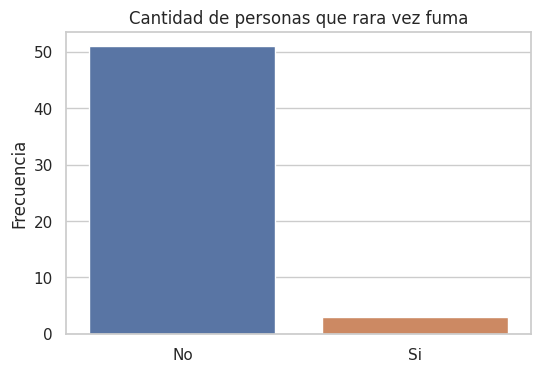

No    51
Si     3
Name: smoke_rarely, dtype: int64


In [13]:
d_trabajo['smoke_rarely'].replace({"Yes": "Si"}, inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.countplot(x = "smoke_rarely", data = d_trabajo, order = d_trabajo["smoke_rarely"].value_counts().iloc[:2].index)
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.title("Cantidad de personas que rara vez fuma")
plt.xticks(rotation=0)
plt.show()

print(d_trabajo['smoke_rarely'].value_counts())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


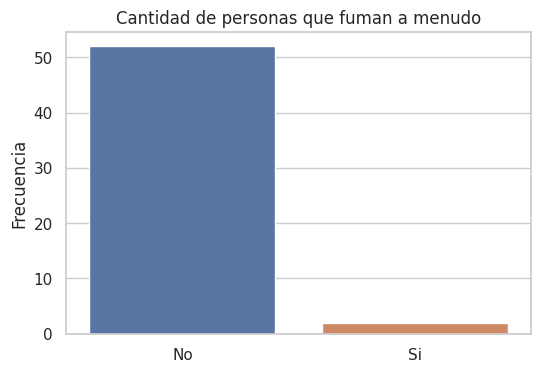

No    52
Si     2
Name: smoke_often, dtype: int64


In [14]:
d_trabajo['smoke_often'].replace({"Yes": "Si"}, inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.countplot(x = "smoke_often", data = d_trabajo, order = d_trabajo["smoke_often"].value_counts().iloc[:2].index)
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.title("Cantidad de personas que fuman a menudo")
plt.xticks(rotation=0)
plt.show()

print(d_trabajo['smoke_often'].value_counts())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


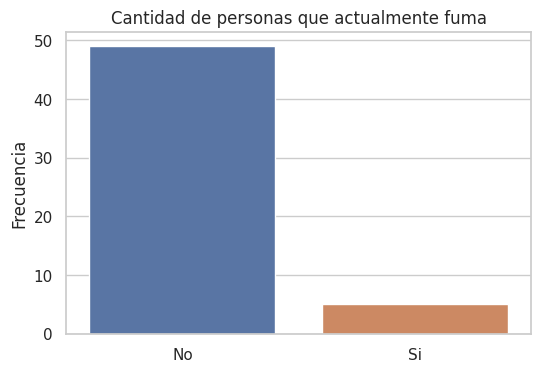

No    49
Si     5
Name: currently_smoke, dtype: int64


In [15]:
d_trabajo['currently_smoke'].replace({"Yes": "Si"}, inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.countplot(x = "currently_smoke", data = d_trabajo, order = d_trabajo["currently_smoke"].value_counts().iloc[:2].index)
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.title("Cantidad de personas que actualmente fuma")
plt.xticks(rotation=0)
plt.show()

print(d_trabajo['currently_smoke'].value_counts())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


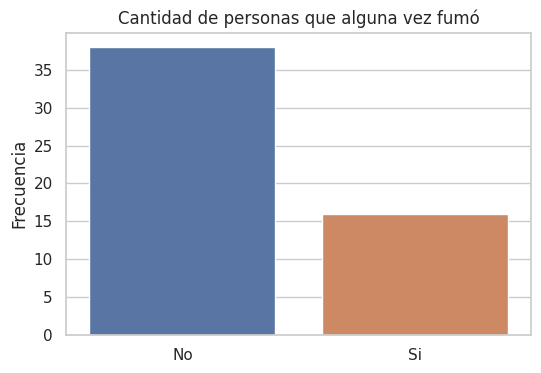

No    38
Si    16
Name: ever_smoked, dtype: int64


In [16]:
d_trabajo['ever_smoked'].replace({"Yes": "Si"}, inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.countplot(x = "ever_smoked", data = d_trabajo, order = d_trabajo["ever_smoked"].value_counts().iloc[:2].index)
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.title("Cantidad de personas que alguna vez fumó")
plt.xticks(rotation=0)
plt.show()

print(d_trabajo['ever_smoked'].value_counts())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


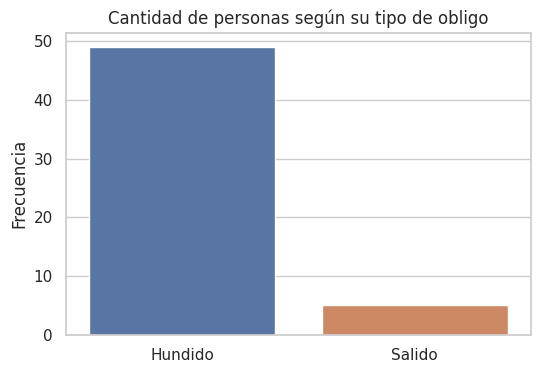

Hundido    49
Salido      5
Name: belly, dtype: int64


In [17]:
d_trabajo['belly'].replace({"Innie": "Hundido"}, inplace = True)
d_trabajo['belly'].replace({"Outie": "Salido"}, inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.countplot(x = "belly", data = d_trabajo, order = d_trabajo["belly"].value_counts().iloc[:2].index)
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.title("Cantidad de personas según su tipo de obligo")
plt.xticks(rotation=0)
plt.show()

print(d_trabajo['belly'].value_counts())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


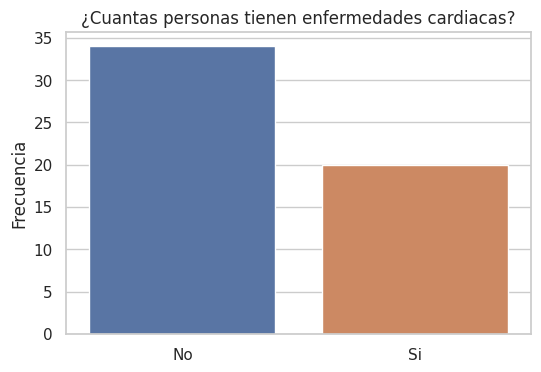

No    34
Si    20
Name: heart_disease, dtype: int64


In [18]:
d_trabajo['heart_disease'].replace({"Yes": "Si"}, inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.countplot(x = "heart_disease", data = d_trabajo, order = d_trabajo["heart_disease"].value_counts().iloc[:2].index)
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.title("¿Cuantas personas tienen enfermedades cardiacas?")
plt.xticks(rotation=0)
plt.show()

print(d_trabajo['heart_disease'].value_counts())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


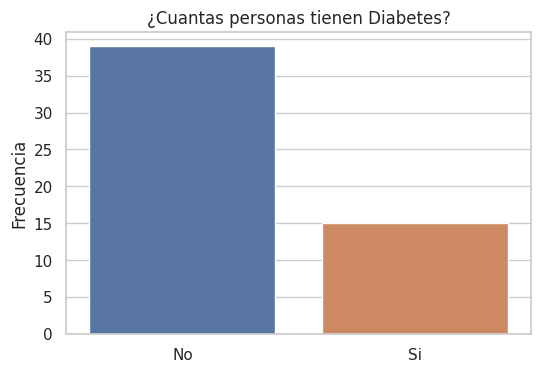

No    39
Si    15
Name: diabetes, dtype: int64


In [19]:
d_trabajo['diabetes'].replace({"Yes": "Si"}, inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.countplot(x = "diabetes", data = d_trabajo, order = d_trabajo["diabetes"].value_counts().iloc[:2].index)
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.title("¿Cuantas personas tienen Diabetes?")
plt.xticks(rotation=0)
plt.show()

print(d_trabajo['diabetes'].value_counts())

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


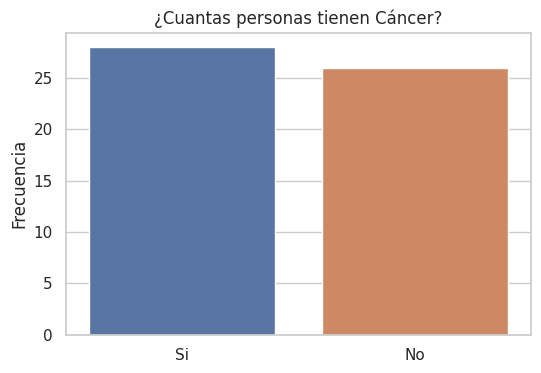

Si    28
No    26
Name: cancer, dtype: int64


In [20]:
d_trabajo['cancer'].replace({"Yes": "Si"}, inplace = True)

sns.set_theme(style="whitegrid")
plt.figure(dpi=100)
sns.countplot(x = "cancer", data = d_trabajo, order = d_trabajo["cancer"].value_counts().iloc[:2].index)
plt.ylabel("Frecuencia")
plt.xlabel("")
plt.title("¿Cuantas personas tienen Cáncer?")
plt.xticks(rotation=0)
plt.show()

print(d_trabajo['cancer'].value_counts())

## **3 - Análisis de Variables Cuantitativas**